# Fall 2023 Data Science Project

# Housing Prices Predictive Analysis Using Regression

**Team:**

*Meghana Appidi,Satya Krishna Kotla*



### Introduction:

In this project, we delve into predictive analytics within the real estate market, aiming to construct a model capable of estimating house prices with a given set of features.

### Methodology:
1. Data Loading and Exploration:
   - Load the dataset and perform initial exploration to understand its structure and content.
2. Data Preprocessing:
   - Handle missing values (if any), convert categorical variables to numerical formats, and manage outliers.
3. Data Visualization:
   - Visualize relationships between different features and the target variable (house prices) to glean insights.
4. Feature Engineering:
   - Create and select relevant features that could improve model performance
5. Model Selection and Training:
   - Train various models, including Linear Regression, Ridge Regression, Lasso Regression
6. Model Evaluation:
   - Evaluate models using metrics like Mean Squared Error (MSE) and R-squared (R²).

7. The choice of these three models for a simple dataset allows for a comprehensive approach:
      - Start with the simplicity and interpretability of Linear Regression.
      - Use Ridge Regression to address potential multicollinearity and overfitting while still maintaining all features.
      - Apply Lasso Regression to explore models that inherently perform feature selection, providing insights on which features are most important for prediction.
      - This multi-model approach ensures robustness in your predictive modeling, allowing you to understand the trade-offs between complexity, interpretability, and prediction accuracy.

In [1]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

In [2]:
data = pd.read_csv("Housing.csv")

In [3]:
data.shape

(545, 13)

In [4]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


**Verifying the null values in the data set**

In [7]:
#Verifying the null values in the data set
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

**There are no null values in the given housing prices data set**

**Verifying duplicates in the data set**

In [8]:
data.duplicated().sum() #check for duplicate values

0

# Data Visualization

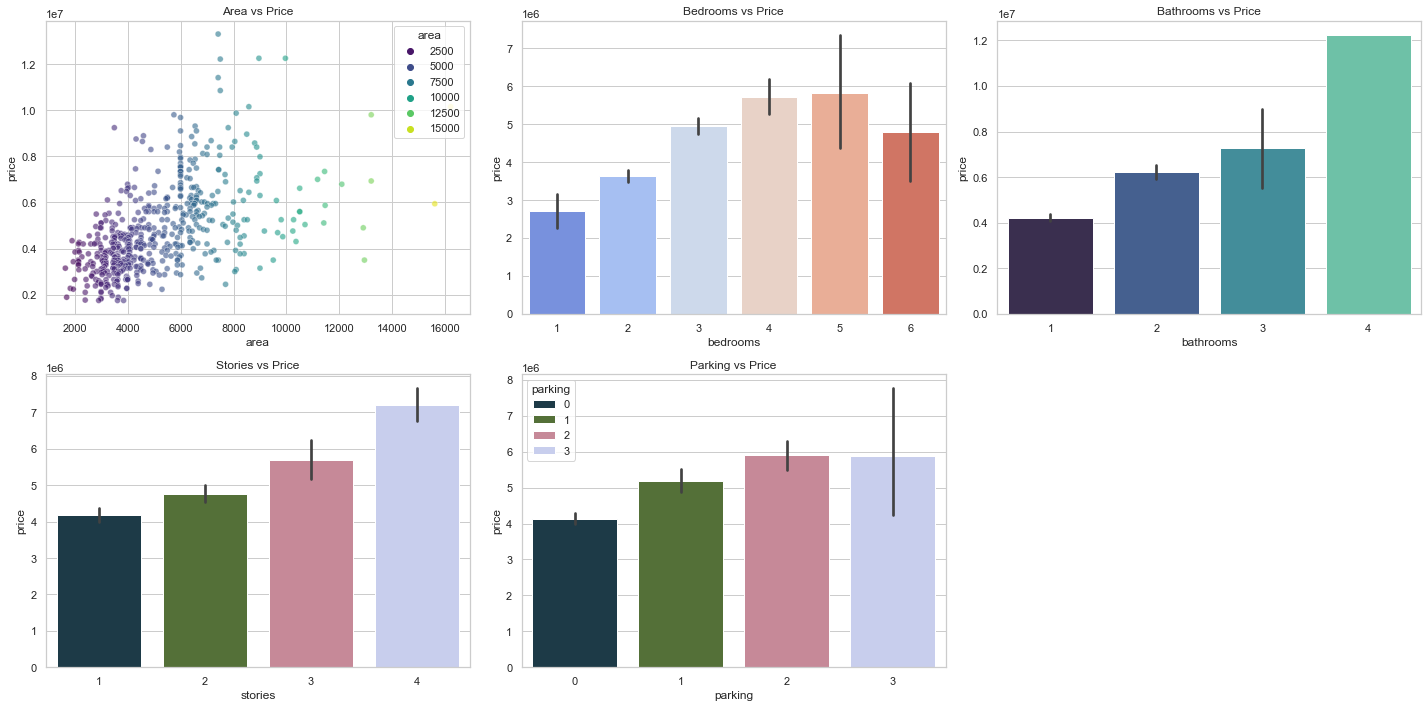

In [9]:
# relationship between features and target variable.
# Setting up the seaborn aesthetic parameters for better visuals
sns.set(style="whitegrid")

# Visualization: Relationships between features and price

# Setting up the matplotlib figure
plt.figure(figsize=(20, 10))

# Relationship between area and price
plt.subplot(2, 3, 1)
sns.scatterplot(x='area', y='price', data=data, palette="viridis", hue='area', alpha=0.6)
plt.title('Area vs Price')

# Relationship between number of bedrooms and price
plt.subplot(2, 3, 2)
sns.barplot(x='bedrooms', y='price', data=data, hue='bedrooms', dodge=False, palette="coolwarm")
plt.legend([],[], frameon=False)
plt.title('Bedrooms vs Price')

# Relationship between number of bathrooms and price
plt.subplot(2, 3, 3)
sns.barplot(x='bathrooms', y='price', data=data, hue='bathrooms', dodge=False, palette="mako")
plt.legend([],[], frameon=False)
plt.title('Bathrooms vs Price')

# Relationship between number of stories and price
plt.subplot(2, 3, 4)
sns.barplot(x='stories', y='price', data=data, hue='stories', dodge=False, palette="cubehelix")
plt.legend([],[], frameon=False)
plt.title('Stories vs Price')

# Relationship between number of parking slots and price
plt.subplot(2, 3, 5)
sns.barplot(x='parking', y='price', data=data, hue='parking', dodge=False, palette="cubehelix")
plt.title('Parking vs Price')

plt.tight_layout()
plt.show()

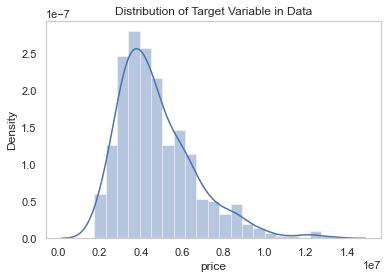

max: 13300000
min: 1750000


In [10]:
# distribution of target variable
sns.distplot(data['price'])
plt.grid()
plt.title('Distribution of Target Variable in Data')
plt.show()
print('max:', np.max(data['price']))
print('min:', np.min(data['price']))

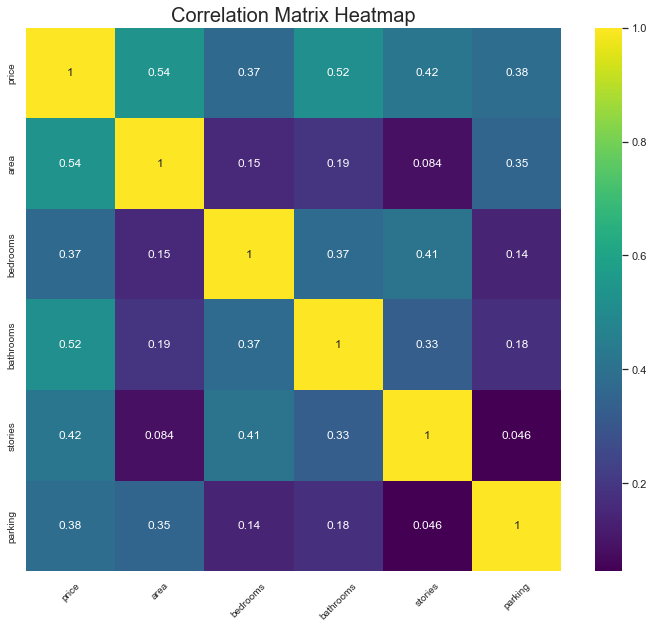

In [11]:
# Calculate the correlation matrix
corr = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))  # Size can be adjusted to fit your needs

sns.heatmap(data.corr(), cmap='viridis',annot=True)

# Additional aesthetics (optional)
plt.title('Correlation Matrix Heatmap', fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

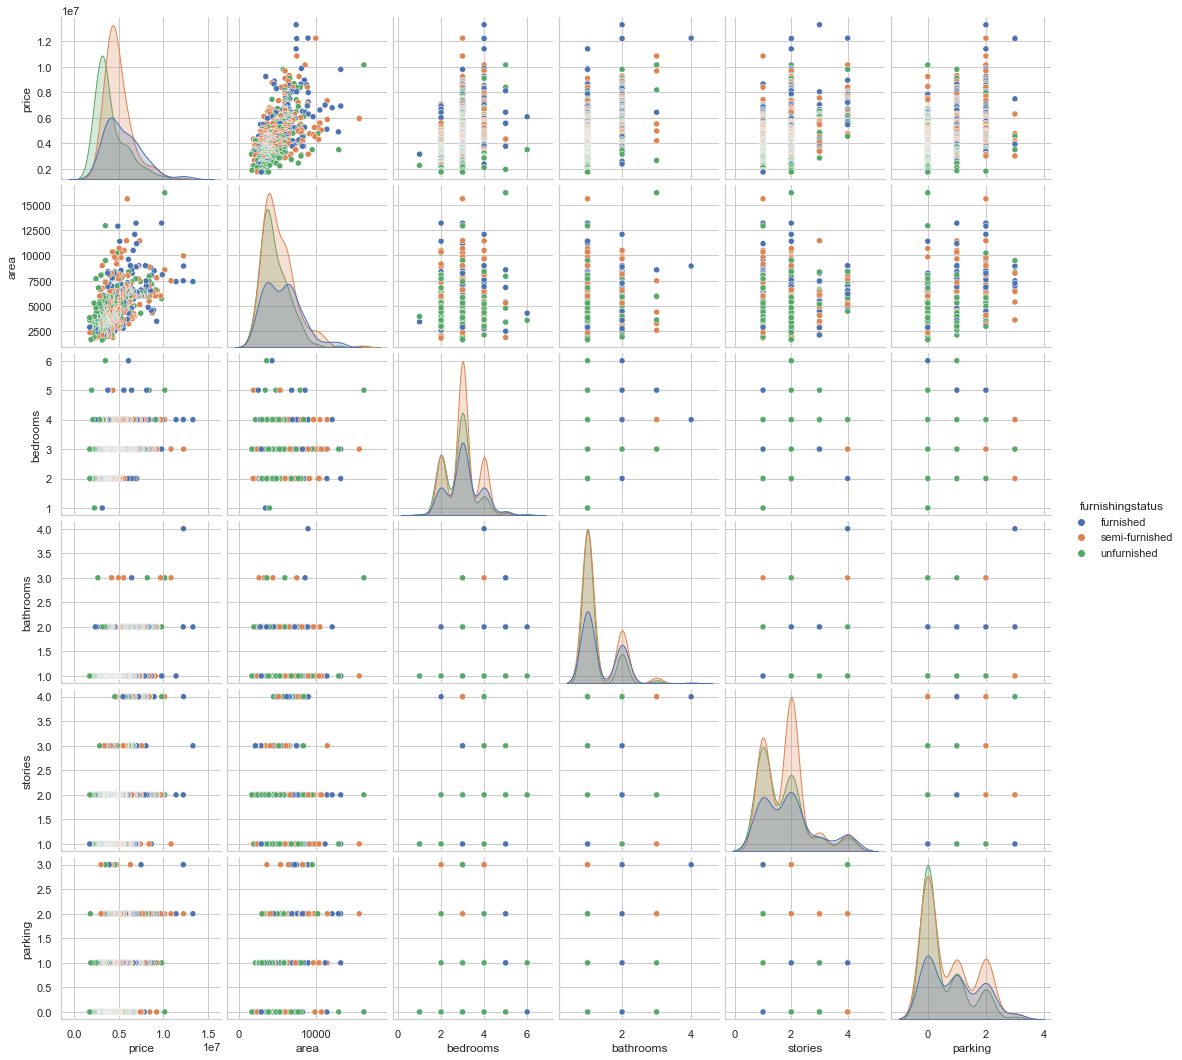

In [12]:
#pair plot
sns.pairplot(data,hue = "furnishingstatus")

**Feature Engineering**

In [13]:
# create another copy of dataset and append encoded features to it
data_train = data.copy()
data_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [14]:
cat_cols = [c for c in data_train.columns if data_train[c].dtype == 'object']
cat_data = data_train[cat_cols]
cat_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [15]:
#one hot encoding
final_data = pd.get_dummies(data_train, columns=cat_cols, drop_first= True)
final_data.shape

(545, 14)

In [16]:
final_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [17]:
final_data

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [18]:
y = final_data['price']
X = final_data.drop(columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (381, 13)
Validation Set Dimensions: (164, 13)


In [19]:
X_train

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
396,3640,2,1,1,1,1,0,0,0,0,0,1,0
123,7320,4,2,2,0,1,0,0,0,0,0,0,0
439,3930,2,1,1,0,0,0,0,0,0,0,0,1
31,7000,3,1,4,2,1,0,0,0,1,0,1,0
226,5170,3,1,4,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,6600,4,2,1,0,1,0,1,0,0,1,1,0
3,7500,4,2,2,3,1,0,1,0,1,1,0,0
378,2275,3,1,3,0,1,0,0,1,1,1,1,0
330,4050,2,1,2,0,1,1,1,0,0,1,0,1


In [20]:
y_train

396     3500000
123     5950000
439     3255000
31      8400000
226     4690000
         ...   
149     5600000
3      12215000
378     3640000
330     3990000
191     5040000
Name: price, Length: 381, dtype: int64

**Feature Scaling:**

*Normalizing the data*

In [21]:
num_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
num_cols

['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [22]:
# Apply standard scaling on numeric data 
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [23]:
X_train

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
396,-0.717035,-1.359480,-0.579854,-0.957082,0.323607,1,0,0,0,0,0,1,0
123,1.068811,1.373828,1.524187,0.215420,-0.828676,1,0,0,0,0,0,0,0
439,-0.576303,-1.359480,-0.579854,-0.957082,-0.828676,0,0,0,0,0,0,0,1
31,0.913520,0.007174,-0.579854,2.560424,1.475890,1,0,0,0,1,0,1,0
226,0.025450,0.007174,-0.579854,2.560424,-0.828676,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0.719407,1.373828,1.524187,-0.957082,-0.828676,1,0,1,0,0,1,1,0
3,1.156163,1.373828,1.524187,0.215420,2.628174,1,0,1,0,1,1,0,0
378,-1.379448,0.007174,-0.579854,1.387922,-0.828676,1,0,0,1,1,1,1,0
330,-0.518068,-1.359480,-0.579854,0.215420,-0.828676,1,1,1,0,0,1,0,1


**Model Training**

*1. Linear regression*

In [24]:
# Model Building: Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [25]:
# model coefficent
model.coef_

array([ 556674.563232  ,  114746.16677472,  426859.74311345,
        375453.07960619,  280595.54348543,  326699.42650756,
        255512.62324131,  339069.45444794,  942709.34070175,
        797164.79645349,  765669.57970863,  -93048.61281715,
       -426318.15343213])

In [26]:
#model intercept
model.intercept_

4016308.009110325

**Model Evaluation**

In [29]:
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)**0.5
r2_train = r2_score(y_train, predictions_train)

mae_test = mean_absolute_error(y_test, predictions_test)
mse_test = mean_squared_error(y_test, predictions_test)**0.5
r2_test_linear = r2_score(y_test, predictions_test)

print("mean absolute error for the train data is : ",mae_train)
print("mean square error for the train data is : ",mse_train)
print("the r2 score is train data is  : ",r2_train)
print("mean absolute error for the test data is : ",mae_test)
print("mean square error for the test data is : ",mse_test)
print("the r2 score for the test data is  : ",r2_test_linear)

mean absolute error for the train data is :  774236.1823770099
mean square error for the train data is :  1074555.0132483507
the r2 score is train data is  :  0.6742963270038442
mean absolute error for the test data is :  798760.3103958535
mean square error for the test data is :  1023730.1725077034
the r2 score for the test data is  :  0.6888225794353844


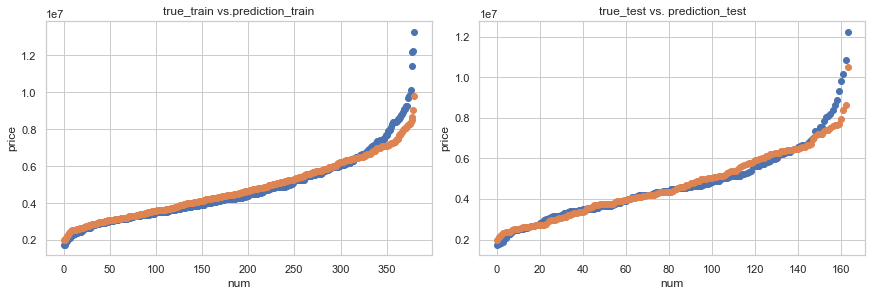

In [30]:
#plotting actual vs predicted

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

ax1.scatter(np.arange(len(np.sort(y_train))),np.sort(y_train), label='true_train')
ax1.scatter(np.arange(len(np.sort(predictions_train))),np.sort(predictions_train), label = 'pred_train')
ax2.scatter(np.arange(len(np.sort(y_test))),np.sort(y_test), label='true_test')
ax2.scatter(np.arange(len(np.sort(predictions_test))),np.sort(predictions_test), label = 'pred_test')

ax1.set_title("true_train vs.prediction_train");  ax2.set_title("true_test vs. prediction_test")
ax1.set_ylabel('price')             ;  ax2.set_ylabel('price') 
ax1.set_xlabel("num")   ;  ax2.set_xlabel('num') 
plt.show()

2.Ridge regression

the mean absolute error for the test data is : 797791.9463144903
the mean squared error for the test data is :  1022934.0332273337
the r2 score for the test data is :  0.6893063870681044


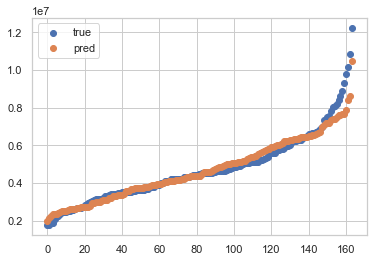

In [31]:
#Ridge regression
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
r2_test_ridge = r2_score(y_test,y_pred)
print("the mean absolute error for the test data is :",mean_absolute_error(y_test,y_pred))
print("the mean squared error for the test data is : ",mean_squared_error(y_test,y_pred)**0.5)
print("the r2 score for the test data is : ",r2_test_ridge)

plt.scatter(np.arange(len(np.sort(y_test))),np.sort(y_test), label='true')
plt.scatter(np.arange(len(np.sort(y_pred))),np.sort(y_pred), label = 'pred')
plt.legend()

In [32]:
ridge.coef_

array([ 557176.82415219,  115816.69213846,  427461.2058021 ,
        376455.04324316,  282227.44652725,  323067.02241791,
        255554.10964448,  338364.18084095,  891437.26237354,
        784108.9243724 ,  753471.23174224,  -89572.67308048,
       -422415.07747092])

3.Lasso regression

the mean absolute error for the test data is : 798759.9336652141
the mean squared error for the test data is :  1023729.7903173163
the r2 score for the test data is :  0.6888228117798044


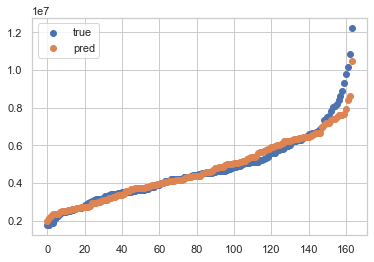

In [33]:
#lasso regression
lasso = Lasso(alpha=1)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
r2_test_lasso = r2_score(y_test,y_pred)
print("the mean absolute error for the test data is :",mean_absolute_error(y_test,y_pred))
print("the mean squared error for the test data is : ",mean_squared_error(y_test,y_pred)**0.5)
print("the r2 score for the test data is : ",r2_test_lasso)

plt.scatter(np.arange(len(np.sort(y_test))),np.sort(y_test),label = "true")
plt.scatter(np.arange(len(np.sort(y_pred))),np.sort(y_pred),label = "pred")
plt.legend()

In [34]:
lasso.coef_

array([ 556675.29127907,  114746.04372818,  426860.23922524,
        375453.0332595 ,  280595.91638284,  326692.43409641,
        255509.31046369,  339067.48766964,  942687.92320312,
        797161.2618393 ,  765666.28168759,  -93039.39082138,
       -426309.91843776])

**Model Accuracy**

In [35]:
Accuracy_score = {'linear_regression':r2_test_linear,'ridge':r2_test_ridge,'lasso':r2_test_lasso}

In [36]:
score = pd.DataFrame.from_dict(Accuracy_score, orient='index', columns=['Accuracy'])
score

,Accuracy
linear_regression,0.688823
ridge,0.689306
lasso,0.688823


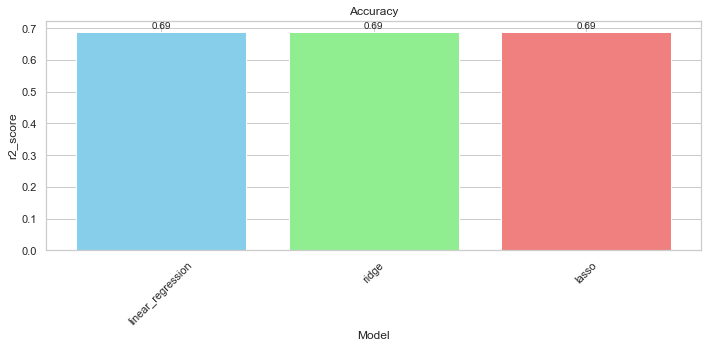

In [37]:
import matplotlib.pyplot as plt

colors = ['skyblue', 'lightgreen', 'lightcoral']

plt.figure(figsize=(10,5 ))
bars = plt.bar(score.index, score['Accuracy'], color=colors)
plt.xlabel('Model')
plt.ylabel('r2_score')
plt.title('Accuracy')
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=10)

plt.tight_layout()

plt.show()

# Inference
* The r2 scores for the test data for Linear , Lasso and ridge rigression are similar
* Hence we can use any of the three regression models for predicting housing prices data.
